In [1]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from sympy.plotting import plot  
from sympy.plotting import plot3d  

from IPython.display import Image
import ipympl

sym.init_printing()
%matplotlib widget
#import mpld3
#mpld3.enable_notebook()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

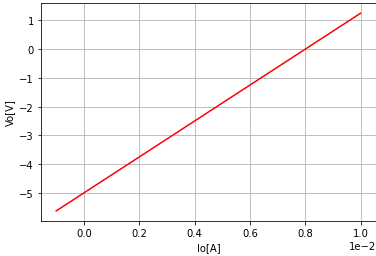

In [2]:
# Problema de diseño: SABOVODA P5.4
# Plantea que a los bornes del Circuito las variables Io Vo
# Respondan como la recta de la figura.

esq= mpimg.imread('Lineal.png') #sube la imagen del circuito esq.
plt.imshow(esq)
plt.show()

Image(filename='Recta.png')  #Muestra la imagen

In [15]:
#Primero hay que determinar la función lineal de la recta
# y = m * x + a

# Ec. Lineal:  y = m*x + a   ->   Vo = Rth * Io + Vth    
sym.var('m, a') #Define variables simbolicas.
(x0,y0)=(8e-3,0)
(x1,y1)=(0,-5)
res=sym.linsolve( [ m * x0 + a - y0,  #1ra ec. 
                    m * x1 + a - y1 ], #2da
                 (m,a)  #se indica que variables calcula
                ) 
#resuelve 2 ec
#res 
display(res)
print("Variable: ",res," y el Tipo: ",type(res))
Matrix=[Rth,Vt]=sym.Matrix((res.args[0][0],res.args[0][1]))
Matrix

Variable:  FiniteSet((625.0, -5.0))  y el Tipo:  <class 'sympy.sets.sets.FiniteSet'>


⎡625.0⎤
⎢     ⎥
⎣-5.0 ⎦

In [4]:
# Se verifica graficando Vo = Rth * Io + Vth remplazando por los valores encontrados
sym.var("Io,Vo")
Vo=Rth*Io+Vt
plt_0=sym.plot(Vo,(Io,-1e-3,10e-3)) #Grafica Vo vs Io para algunos valores de Io
display(Vo)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

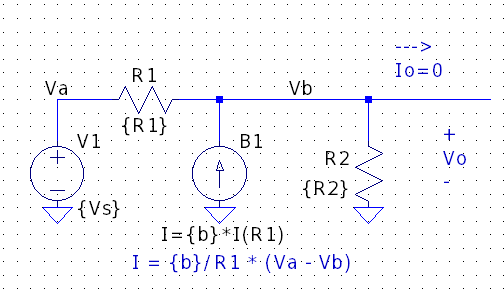

In [5]:
# Para resolver el circuito y encontrar su equivalente Thevenin
# Hay que encontrar Vth y Rth.
# Tanto Vth o In es facil calcularlos aplicando: 
# El metodo LKV para encontrar In en el Circuito cuando Vo=0
# El metodo LKC para encontrar Vth en el Circuito cuando Io=0
# Rth = Vth / In
Image(filename='Thevenin.png')#Muestra el circuito para encontrar Vth

In [6]:

#Thevenin : APLICAR LKC [I]=[G]*[V]
Va, Vb= sym.symbols('Va, Vb') #Define los nodos (simbolic)
Vm = sym.Matrix(([Va],[Vb])) #Define la matriz (simb)

In [7]:
R1, R2 = sym.symbols('R1, R2') #Defino la matriz GG 

GG = sym.Matrix(( [1, 0] ,
                  [0, 1/R1+1/R2]
                 ))

In [8]:
b, Vs = sym.symbols('b, Vs') #Defino la matriz I 

II=sym.Matrix(([Vs],
               [(b/R1)*(Va-Vb)]
              ))


⎡    Vs     ⎤   ⎡     Va     ⎤
⎢           ⎥   ⎢            ⎥
⎢b⋅(Va - Vb)⎥ = ⎢   ⎛1    1 ⎞⎥
⎢───────────⎥   ⎢Vb⋅⎜── + ──⎟⎥
⎣     R₁    ⎦   ⎣   ⎝R₂   R₁⎠⎦

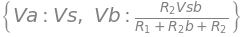

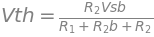

In [9]:
ec=sym.Eq(II,GG*Vm)
display(ec)
Vres=sym.solve(ec,Vm) #Con la función de vuelve la solución de Eq resolviendo para Vm=[Va],[Vb]
display(Vres)

sym.var('Vth')
display(sym.Eq(Vth,Vres[Vb]))

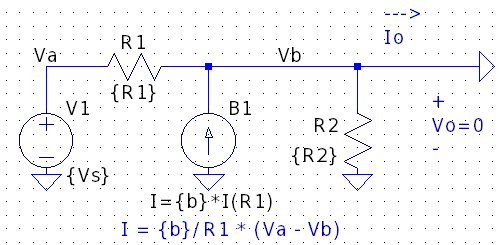

In [10]:
Image(filename='Norton.png')#Muestra el circuito para encontrar In


In [11]:
sym.var('I0, I1, I2') 
#  Vs = I0 * R1 + I1 * R2 - I2 * R2 ;
#  b*I0 = I1-I0   
#  0 = R2*I1 - R2*I2

II=sym.Matrix(([I0],[I1],[I2]))
VV=sym.Matrix(([Vs],[b*I0],[0]))
RR=sym.Matrix(([R1,R2,-R2],[-1, 1, 0],[0,R2,-R2]))
display(sym.Eq(VV,RR*II))
VV=sym.Matrix(([Vs],[0],[0]))
RR=sym.Matrix(([R1,R2,-R2],[-(1+b), 1, 0],[0,R2,-R2]))
display(sym.Eq(VV,RR*II))
Ires=RR**-1*VV
display(Ires)

sym.var('In')
display(sym.Eq(In,sym.simplify(Ires[2])))

⎡ Vs ⎤   ⎡I₀⋅R₁ + I₁⋅R₂ - I₂⋅R₂⎤
⎢    ⎥   ⎢                     ⎥
⎢I₀⋅b⎥ = ⎢      -I₀ + I₁       ⎥
⎢    ⎥   ⎢                     ⎥
⎣ 0  ⎦   ⎣    I₁⋅R₂ - I₂⋅R₂    ⎦

⎡Vs⎤   ⎡I₀⋅R₁ + I₁⋅R₂ - I₂⋅R₂⎤
⎢  ⎥   ⎢                     ⎥
⎢0 ⎥ = ⎢  I₀⋅(-b - 1) + I₁   ⎥
⎢  ⎥   ⎢                     ⎥
⎣0 ⎦   ⎣    I₁⋅R₂ - I₂⋅R₂    ⎦

⎡     Vs     ⎤
⎢     ──     ⎥
⎢     R₁     ⎥
⎢            ⎥
⎢ Vs⋅(b + 1) ⎥
⎢ ────────── ⎥
⎢     R₁     ⎥
⎢            ⎥
⎢   ⎛b    1 ⎞⎥
⎢Vs⋅⎜── + ──⎟⎥
⎣   ⎝R₁   R₁⎠⎦

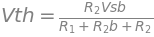

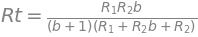

In [12]:
#La resistencia de Thevenin es Vth/In
In=sym.simplify(Ires[2])
sym.var('Vth')
display(sym.Eq(Vth,Vres[Vb]))
Vth=sym.simplify(Vres[Vb])
sym.var('Rt')
display(sym.Eq(Rt,Vth/In))
Rt=Vth/In

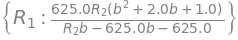

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
from sympy.plotting import plot3d
from sympy.plotting import plot3d_parametric_surface
sym.var('R1')
display((sym.solve([Rth-Rt],R1)))
R1=sym.solve([Rth-Rt],R1)[R1]
plot3d(R1, (b, -10,10),(R2, 1,100),zlabel="R1",xlabel="b", ylabel="R2")
plot3d_parametric_surface(R1, R2, b ,(b, -10,10),(R2, 1,100),zlabel="b",xlabel="R1", ylabel="R2")

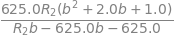

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
sym.var('Vs, R1')
display((sym.solve([Vth-Vt],Vs)))
Vs=sym.solve([Vth-Vt],Vs)[Vs]
RR1=sym.solve([Rth-Rt],R1)[R1]
display(RR1)
plot3d(Vs.subs(R1,RR1), (b, -10,10),(R2, 1,100),zlabel="Vs",xlabel="b", ylabel="R2")
plot3d_parametric_surface(Vs.subs(R1,RR1), R2, b ,(b, -10,10),(R2, 1,100),zlabel="b",xlabel="Vs", ylabel="R2")
